In [9]:
from training_defs import load_spectral_data, get_dataloaders
from model import MLP
import torch, torch.nn as nn, torch.optim as optim
import matplotlib.pyplot as plt

X, y = load_spectral_data()
train_loader, val_loader = get_dataloaders(X, y)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(in_dim=X.shape[1], h_dim=128, out_dim=3).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 50
train_losses, val_losses = [], []

In [13]:
for epoch in range(1, n_epochs+1):
    model.train()
    tot_train = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        tot_train += loss.item() * xb.size(0)
    train_losses.append(tot_train / len(train_loader.dataset))

    model.eval()
    tot_val = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            tot_val += criterion(model(xb), yb).item() * xb.size(0)
    val_losses.append(tot_val / len(val_loader.dataset))

    print(f"epoch {epoch:02d}  train mse: {train_losses[-1]:.4f}  val mse: {val_losses[-1]:.4f}")

epoch 01  train mse: 0.0103  val mse: 0.0127
epoch 02  train mse: 0.0095  val mse: 0.0134
epoch 03  train mse: 0.0116  val mse: 0.0112
epoch 04  train mse: 0.0096  val mse: 0.0114
epoch 05  train mse: 0.0102  val mse: 0.0098
epoch 06  train mse: 0.0089  val mse: 0.0097
epoch 07  train mse: 0.0087  val mse: 0.0095
epoch 08  train mse: 0.0089  val mse: 0.0108
epoch 09  train mse: 0.0094  val mse: 0.0174
epoch 10  train mse: 0.0116  val mse: 0.0153
epoch 11  train mse: 0.0095  val mse: 0.0114
epoch 12  train mse: 0.0090  val mse: 0.0164
epoch 13  train mse: 0.0111  val mse: 0.0111
epoch 14  train mse: 0.0107  val mse: 0.0135
epoch 15  train mse: 0.0118  val mse: 0.0116
epoch 16  train mse: 0.0097  val mse: 0.0100
epoch 17  train mse: 0.0088  val mse: 0.0117
epoch 18  train mse: 0.0084  val mse: 0.0094
epoch 19  train mse: 0.0083  val mse: 0.0092
epoch 20  train mse: 0.0080  val mse: 0.0148
epoch 21  train mse: 0.0110  val mse: 0.0106
epoch 22  train mse: 0.0086  val mse: 0.0120
epoch 23  

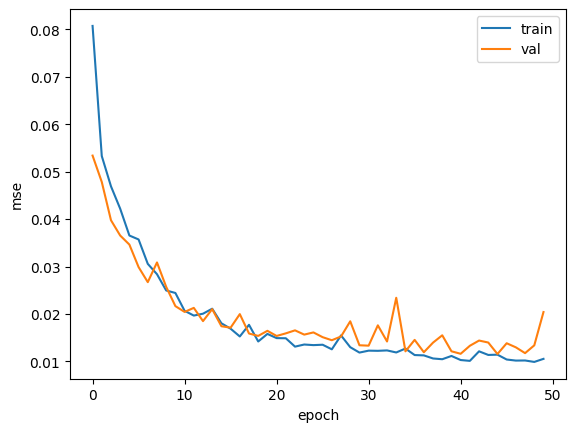

In [4]:
plt.plot(train_losses, label="train")
plt.plot(val_losses,   label="val")
plt.xlabel("epoch"); plt.ylabel("mse"); plt.legend(); plt.show()

torch.save(model.state_dict(), "spectra_mlp.pth")

In [14]:
import numpy as np
from sklearn.metrics import r2_score, root_mean_squared_error

model.eval()

all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb)
        all_preds.append(preds.cpu().numpy())
        all_targets.append(yb.cpu().numpy())

all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

r2 = r2_score(all_targets, all_preds, multioutput="uniform_average")
rmse = root_mean_squared_error(all_targets, all_preds)

print(f"validation r^2:  {r2:.4f}")
print(f"validation rmse: {rmse:.4f}")

validation r^2:  0.8622
validation rmse: 0.1097
